## Diamonds Dataset

## Frame the problem
Predict the price of the diamonds

## Acquire the Data

In [32]:
import pandas as pd

In [33]:
df = pd.read_csv('diamonds.csv')

In [9]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Refine the data

## Explore the Data

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (9,7)

df.shape

(53940, 10)

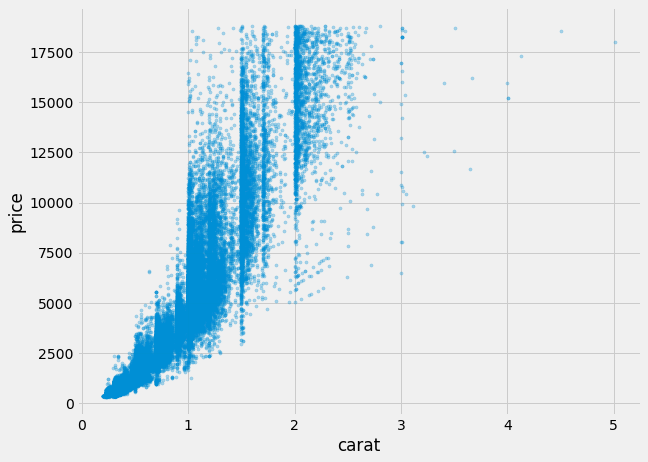

In [17]:
df.plot(kind="scatter", x="carat", y="price", s=10, alpha=0.3)

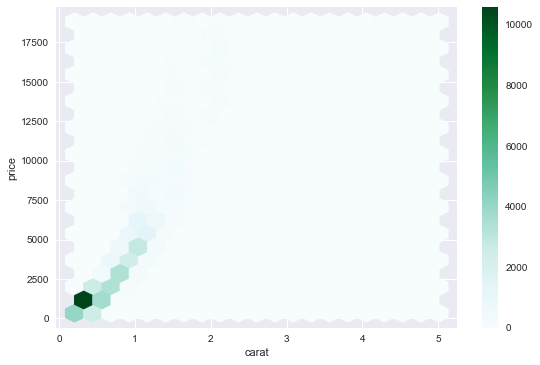

In [43]:
df.plot(kind="hexbin", x="carat", y="price", gridsize=20)

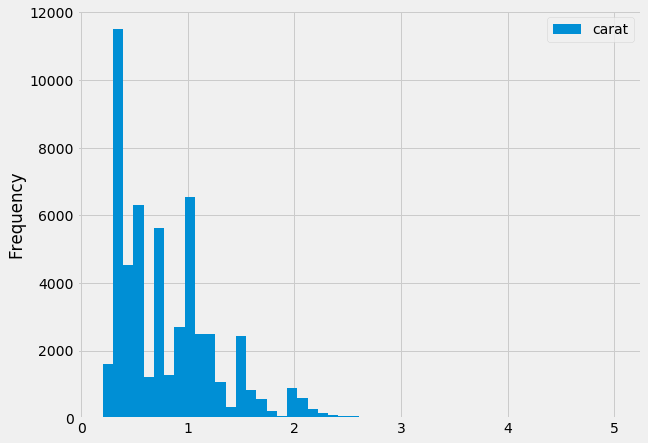

In [23]:
df.plot(kind="hist", y="carat", bins=50)

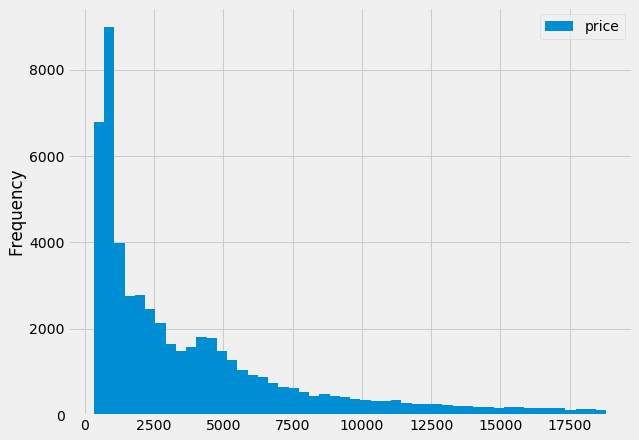

In [28]:
df.plot(kind="hist", y="price", bins=50)

In [25]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [34]:
import numpy as np

df['priceLog'] = np.log(df.price)
df['caratLog'] = np.log(df.carat)

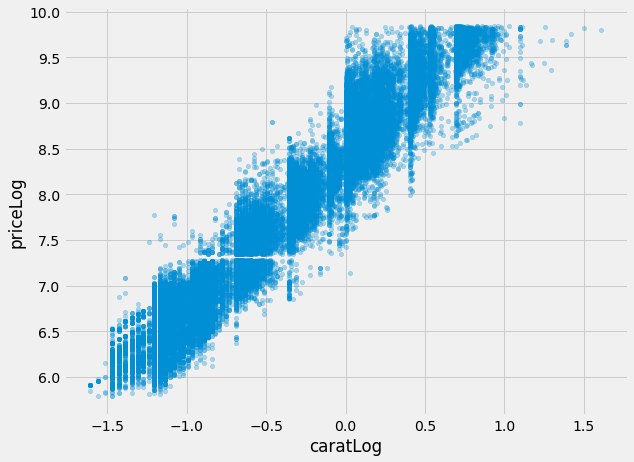

In [35]:
df.plot(kind="scatter", x="caratLog", y="priceLog", s=20, alpha=0.3)

In [40]:
import seaborn as sns

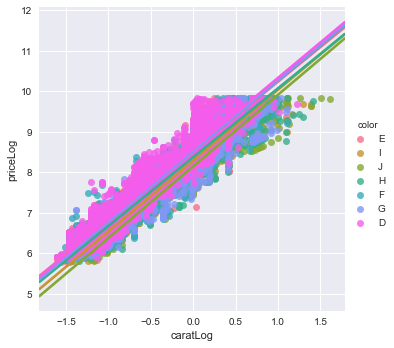

In [44]:
sns.lmplot(data=df, y='priceLog', x='caratLog', hue='color')

## Model

In [45]:
from sklearn import linear_model

In [58]:
lm=linear_model.LinearRegression(normalize=True)

In [59]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [60]:
y = df.priceLog

In [61]:
X = df[['caratLog', 'color', 'cut', 'clarity']]

In [62]:
X.head()

,caratLog,color,cut,clarity
0,-1.469676,E,Ideal,SI2
1,-1.560648,E,Premium,SI1
2,-1.469676,E,Good,VS1
3,-1.237874,I,Premium,VS2
4,-1.171183,J,Good,SI2


In [63]:
X.shape

(53940, 4)

In [64]:
X_encoded=pd.get_dummies(X)

In [65]:
X_encoded.head()

,caratLog,color_D,color_E,color_F,color_G,color_H,color_I,color_J,cut_Fair,cut_Good,...,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.469676,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-1.560648,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,-1.469676,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,-1.237874,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,-1.171183,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [66]:
lm.fit(X_encoded,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [69]:
yhat = lm.predict(X_encoded)

In [70]:
yhat

array([ 5.62359619,  5.59564209,  5.92828369, ...,  7.89538574,
        7.88867188,  7.90405273])

In [71]:
from sklearn.metrics import mean_squared_error

In [74]:
mse = mean_squared_error(y_true=y, y_pred=yhat)
mse

0.017898116493291934

In [73]:
y.mean()

7.786768479077133

In [75]:
np.sqrt(mse)

0.13378384242236405